    100% |████████████████████████████████| 1.6MB 844kB/s ta 0:00:01
  Stored in directory: /home/etienne/.cache/pip/wheels/d1/42/6d/c8e60fc311e60e56dee137292c31e4c3034e699ecc4329e64a
Successfully built triangle
You are using pip version 19.0.1, however version 19.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [38]:
import matplotlib.pyplot as plt
import numpy as np

# Mesh with Triangle

https://rufat.be/triangle/API.html?highlight=node

http://www.cs.cmu.edu/~quake/triangle.html

    $ pip install triangle

In [39]:
import triangle as tr

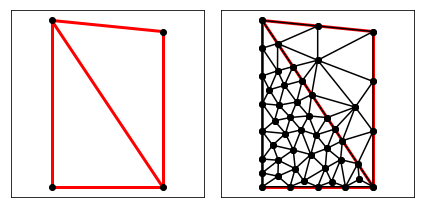

In [54]:
A = dict(vertices=np.array(((0, 0), (1, 0), (1, 1.4), (0, 1.5))),
         segments=np.array([[0, 1], [1, 2], [2, 3], [3, 0], [1, 3]]),
         regions=np.array([[.1, .5, 1, 0.02],]))

B = tr.triangulate(A, 'paq')
tr.compare(plt, A, B)
plt.show()

 ### Writing a .poly file
 
 doc:  
 
     .poly files

        First line: <# of vertices> <dimension (must be 2)> <# of attributes> <# of boundary markers (0 or 1)>
        Following lines: <vertex #> <x> <y> [attributes] [boundary marker]
        One line: <# of segments> <# of boundary markers (0 or 1)>
        Following lines: <segment #> <endpoint> <endpoint> [boundary marker]
        One line: <# of holes>
        Following lines: <hole #> <x> <y>
        Optional line: <# of regional attributes and/or area constraints>
        Optional following lines: <region #> <x> <y> <attribute> <maximum area> 

In [200]:
import matplotlib.pylab as plt
import numpy as np

In [252]:
class Geometry(object):
    def __init__(self):
        self.vertices = {}
        self.segments = []
        self.holes = []
        
    def add_vertex(self, name, *coords, attributes=None, marker=None):
        if name not in self.vertices:
            self.vertices[name] = {'coords':coords,
                                   'attributes':attributes,
                                   'marker':marker}
        else:
            print('Vertex %s already exists' % name)
            
    def add_segment(self, start_point, end_point, marker=None):
        self.segments.append({
            'start':start_point,
            'end':end_point,
            'marker':marker
        })
        
    def add_hole(self, *coords):
        self.holes.append(coords)
        
    def plot(self):
        plt.figure();
        coords = np.array([v['coords'] for v in self.vertices.values()])
        plt.plot(coords[:, 0], coords[:, 1], 'ok', zorder=1)
        
        for segment in self.segments:               
            xa, ya = self.vertices[segment['start']]['coords']
            xb, yb = self.vertices[segment['end']]['coords']
            plt.plot([xa, xb], [ya, yb], 'r-', zorder=0)
        
        plt.axis('equal');
        
    def close(self, *list_of_vertex, marker=None):
        for k in range(len(list_of_vertex)-1):
            self.add_segment(list_of_vertex[k], list_of_vertex[k+1],
                             marker=marker)
            
        self.add_segment(list_of_vertex[k+1], list_of_vertex[0],
                         marker=marker)

In [255]:
geo = Geometry()
geo.add_vertex('A', 0, 0)
geo.add_vertex('B', 1, 0)
geo.add_vertex('C', 1, 1)
geo.add_vertex('D', 0, 1)

geo.add_vertex('hE', .6, .8)
geo.add_vertex('hF', .8, .8)
geo.add_vertex('hG', .8, .6)

geo.close('hE', 'hF', 'hG', marker='hole')
geo.add_hole(0, 0)

geo.close('A', 'B', 'C', 'D', marker='square')

In [261]:
geo.add_segment(A, 'C')

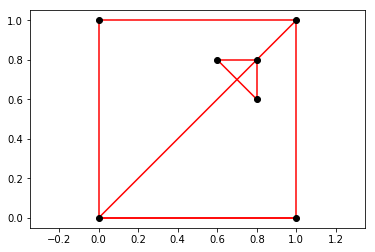

In [262]:
geo.plot()

In [258]:
geo.holes

vertices = ((0, 0), (1, 0), (1, 1.4), (0, 1.5))

segments=np.array([[0, 1], [1, 2], [2, 3], [3, 0], [1, 3]])

nbr_vertices = len(vertices)
nbr_vertex_attributes = 0
nbr_vertex_boundary_markers = 0
nbr_boundary_markers = 1  # on segments

# Vertices
lines = '{} 2 {} {}\n'.format(len(vertices),
                              nbr_vertex_attributes,
                             nbr_vertex_boundary_markers)

for i, (x, y) in enumerate(vertices):
    lines +=  '{} {} {}\n'.format(i, x, y)

# Segments
lines += '{} {}\n'.format(len(segments), nbr_vertex_boundary_markers)

for i, (u, v) in enumerate(segments):
    lines +=  '{} {} {}\n'.format(i, u, v)

# holes
lines += '0'

print(lines)

[(0, 0)]

In [134]:
with open("test.poly", "w") as f:
    f.write(lines.strip('\n'))

## Mesh with meshPy


In [12]:
import meshpy.triangle as triangle

import matplotlib.pyplot as plt
import numpy as np

In [13]:
def round_trip_connect(start, end):
    return [(i, i+1) for i in range(start, end)] + [(end, start)]

In [24]:
points = [(0, 0), (1, 0), (1, 1), (0, 1)]
segments = [[0, 1], [1, 2], [2, 3], [3, 0], [0, 2]]

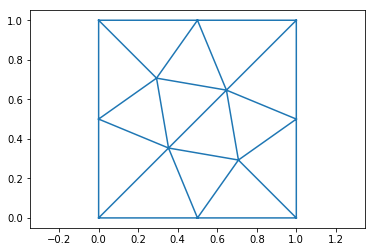

In [37]:
info = triangle.MeshInfo()
info.set_points(points)
#info.set_holes([(0.1, .2)])

info.set_facets(segments)
info.set_points?

mesh = triangle.build(info,
                      volume_constraints=True,
                      max_volume=.1)#, refinement_func=needs_refinement)

mesh_points = np.array(mesh.points)
mesh_tris = np.array(mesh.elements)


plt.triplot(mesh_points[:, 0], mesh_points[:, 1], mesh_tris)
plt.axis('equal');

In [34]:
mesh.holes